<a href="https://colab.research.google.com/github/educanto/keras_fashion_mnist/blob/main/train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Imports**

In [27]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model

# **Loading dataset**

In [28]:
dataset = keras.datasets.fashion_mnist
((x_train, y_train), (x_test, y_test)) = dataset.load_data()

labels = {0:'Camiseta', 1:'Calça', 2:'Pullover',3:'Vestido', 4:'Casaco', 5:'Sandália', 6:'Camisa', 7:'Tênis', 8:'Bolsa', 9:'Bota'}

# **Checking dataset**

In [29]:
print(x_train.shape)
print(x_test.shape)

print(y_train.min())
print(y_train.max())

(60000, 28, 28)
(10000, 28, 28)
0
9


# **Showing some data**

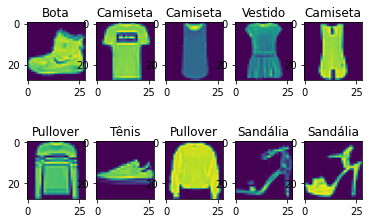

In [30]:
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i])
    plt.title(labels[y_train[i]])

# **Normalizing images**

In [31]:
x_train = x_train/float(255)
x_test = x_test/float(255)

# **Create, compile and train model**

In [32]:
model = keras.Sequential([ 
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

#keras.io/api/optimizers/adam/
adam = keras.optimizers.Adam(lr=0.001)

#keras.io/api/callbacks/
callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss',
                                           patience=2),
             keras.callbacks.ModelCheckpoint(filepath='best_model.hdf5',
                                            monitor='val_loss',
                                            save_best_only=True)]

model.compile(optimizer=adam, 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historical = model.fit(x_train, y_train, 
                       batch_size=480, 
                       epochs=10, 
                       validation_split=0.2,
                       callbacks=callbacks)

Epoch 1/10


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


100/100 [==============================] - 3s 28ms/step - loss: 0.7073 - accuracy: 0.7581 - val_loss: 0.4910 - val_accuracy: 0.8290
Epoch 2/10
100/100 [==============================] - 2s 18ms/step - loss: 0.4682 - accuracy: 0.8389 - val_loss: 0.4226 - val_accuracy: 0.8521
Epoch 3/10
100/100 [==============================] - 2s 17ms/step - loss: 0.4170 - accuracy: 0.8540 - val_loss: 0.3963 - val_accuracy: 0.8608
Epoch 4/10
100/100 [==============================] - 2s 17ms/step - loss: 0.3873 - accuracy: 0.8639 - val_loss: 0.3765 - val_accuracy: 0.8674
Epoch 5/10
100/100 [==============================] - 2s 18ms/step - loss: 0.3638 - accuracy: 0.8709 - val_loss: 0.3592 - val_accuracy: 0.8729
Epoch 6/10
100/100 [==============================] - 2s 17ms/step - loss: 0.3461 - accuracy: 0.8762 - val_loss: 0.3453 - val_accuracy: 0.8775
Epoch 7/10
100/100 [==============================] - 2s 17ms/step - loss: 0.3305 - accuracy: 0.8827 - val_loss: 0.3401 - val_accuracy: 0.8778
Epoch 8/10

In [33]:
# print(historical.history.keys())
model.summary()
# weights, bias = model.layers[1].get_weights()
model.get_config()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_16 (Dense)            (None, 256)               200960    
                                                                 
 dropout_8 (Dropout)         (None, 256)               0         
                                                                 
 dense_17 (Dense)            (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


{'name': 'sequential_8',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 28, 28),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'flatten_8_input'}},
  {'class_name': 'Flatten',
   'config': {'name': 'flatten_8',
    'trainable': True,
    'batch_input_shape': (None, 28, 28),
    'dtype': 'float32',
    'data_format': 'channels_last'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_16',
    'trainable': True,
    'dtype': 'float32',
    'units': 256,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dropout',
   'config': {'name': 'dropout_8',
    'trainable': True,
    'dtype': 'float32',
 

# **Save model**

In [34]:
model.save('model.h5')

# **Load model**

In [35]:
loaded_model = load_model('model.h5')

# **Results**

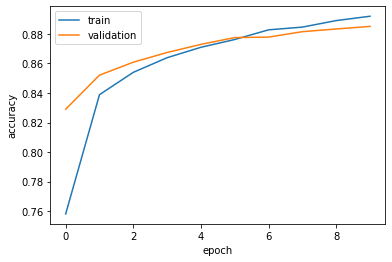

In [36]:
plt.plot(historical.history['accuracy'])
plt.plot(historical.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'validation'])


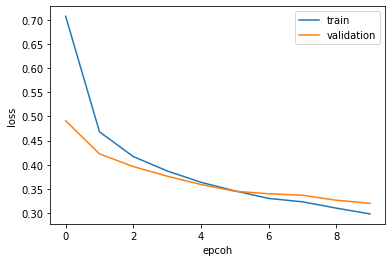

In [37]:
plt.plot(historical.history['loss'])
plt.plot(historical.history['val_loss'])
plt.xlabel('epcoh')
plt.ylabel('loss')
plt.legend(['train', 'validation'])

# **Testing loaded model**

In [38]:
tests = model.predict(x_test)
print('test result:', np.argmax(tests[1]))
print('test image number:', y_test[1])

tests_saved_model = loaded_model.predict(x_test)
print('test result saved model:', np.argmax(tests_saved_model[1]))
print('test image number:', y_test[1])

313/313 [==============================] - 1s 2ms/step
test result: 2
test image number: 2
313/313 [==============================] - 1s 2ms/step
test result saved model: 2
test image number: 2


# **Evaluating the model**

In [39]:
test_loss, acc_test = model.evaluate(x_test, y_test)
print('test loss:', test_loss)
print('test accuracy:', acc_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3427 - accuracy: 0.8797
test loss: 0.34272274374961853
test accuracy: 0.8797000050544739
